# Level 2

## Task 1: Restaurant Ratings

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
resturant = pd.read_csv("C:/Users/AKASH HN/Downloads/ds internship/Dataset .csv")
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = resturant.dropna()
data.head(1)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314


## Distribution of aggregate ratings

In [3]:
bins = [-1, 1, 2, 3, 4, 5]
df_rating = pd.cut(data['Aggregate rating'],bins = bins,right = True)
rating_count = df_rating.value_counts()
print('Aggrigate Rating range with count')
rating_count

Aggrigate Rating range with count


Aggregate rating
(3, 4]     4381
(-1, 1]    2148
(2, 3]     1891
(4, 5]     1112
(1, 2]       10
Name: count, dtype: int64

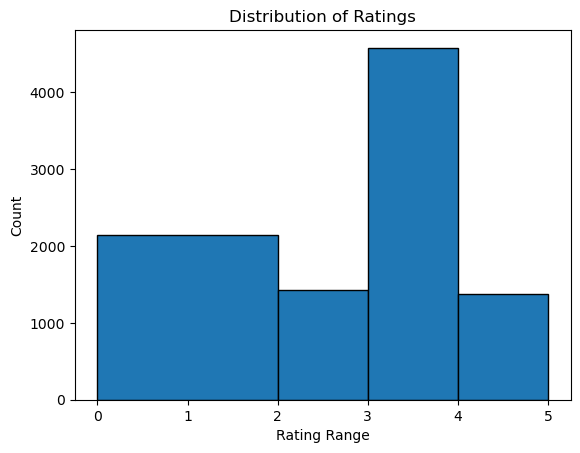

In [4]:
plt.hist(data['Aggregate rating'],bins = [0,  2, 3, 4, 5],edgecolor="black")
plt.title('Distribution of Ratings')
plt.xlabel('Rating Range')
plt.ylabel('Count')
plt.show()

## Most common rating range

In [5]:
print('The most common rating range is: ')
print(f'{rating_count.index[0]} is the most common rating range')

The most common rating range is: 
(3, 4] is the most common rating range


## The average number of votes received by restaurants.

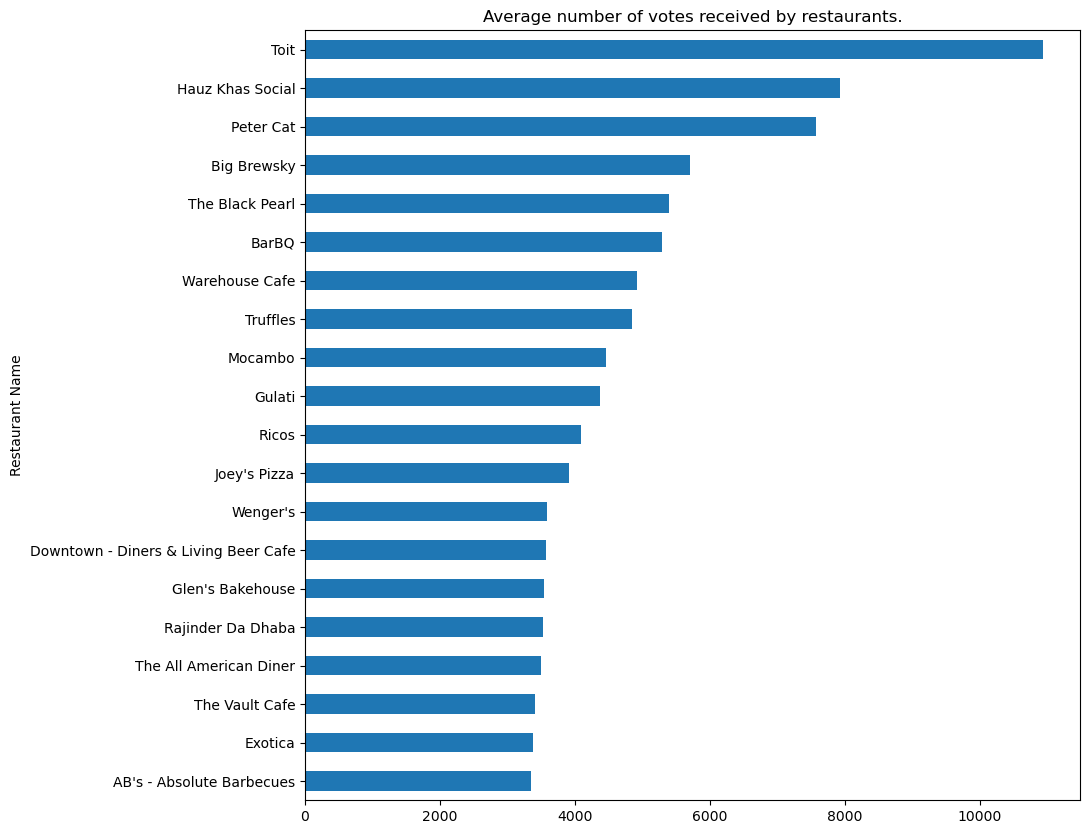

In [6]:
vote_avg = data.groupby('Restaurant Name')['Votes'].mean()
vote_avg = vote_avg.sort_values(ascending = False)[:20]
plt.figure(figsize = (10,10))
vote_avg.plot.barh()
plt.title('Average number of votes received by restaurants.')
plt.gca().invert_yaxis()
plt.show()

## Task 2 : Cuisine Combination

### Most common combinations of cuisines in the dataset

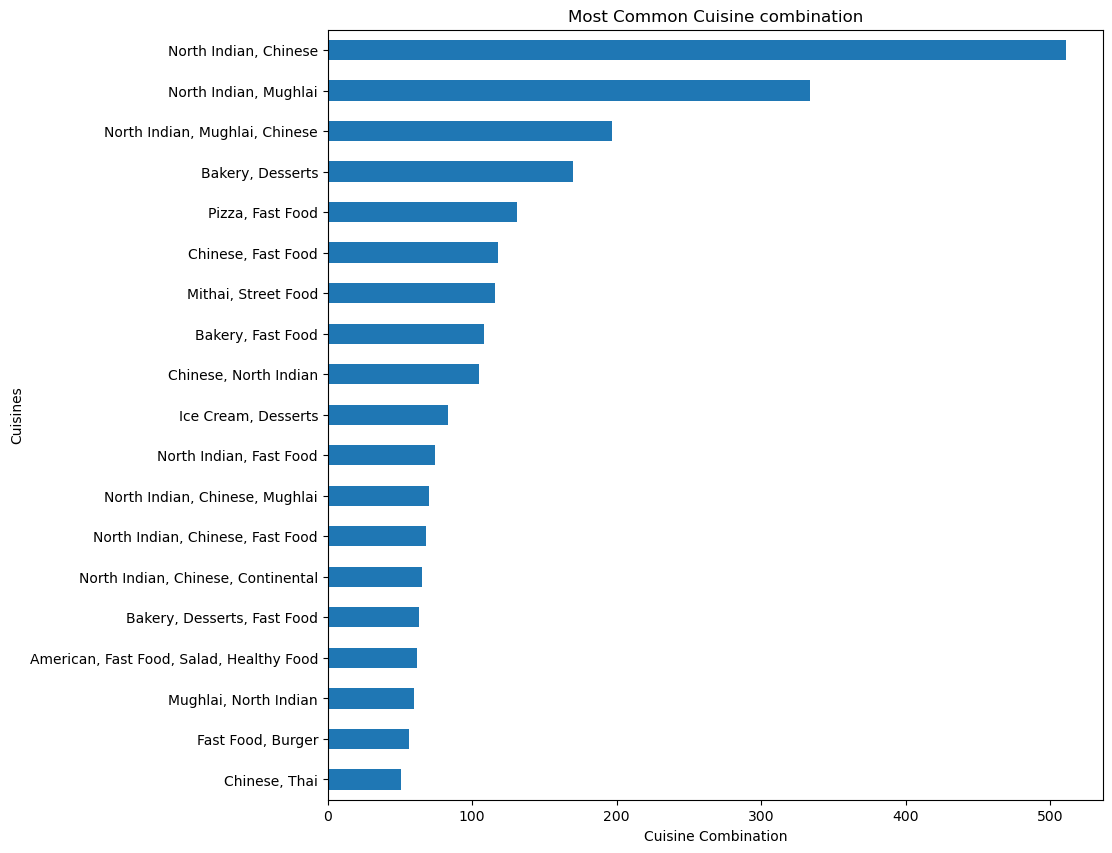

In [7]:
filtered_data = data['Cuisines'].value_counts()
filtered_data = filtered_data[filtered_data > 50]
cuisine_combinations = filtered_data[filtered_data.index.str.contains(',')]
plt.figure(figsize = (10,10))
cuisine_combinations.plot.barh()
plt.title('Most Common Cuisine combination')
plt.xlabel('Cuisine Combination')
plt.gca().invert_yaxis()
plt.show()

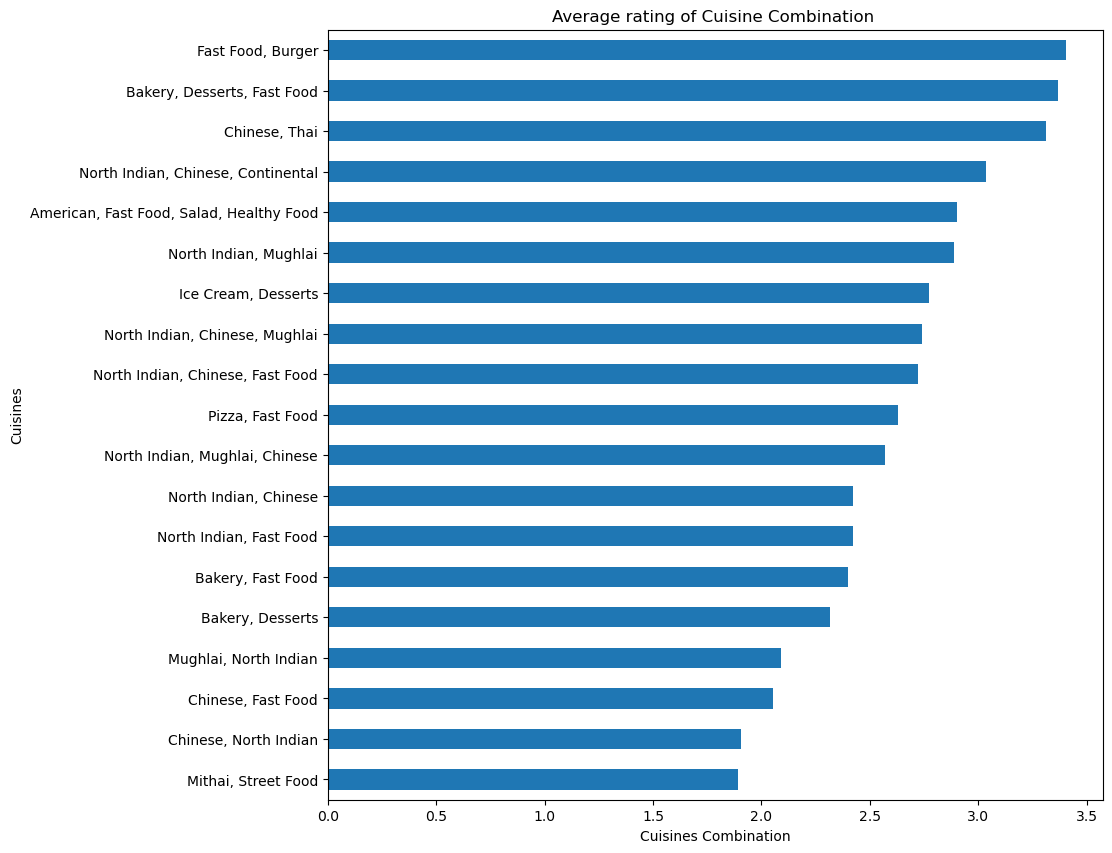

In [15]:
Cuisine_Rating = data.groupby('Cuisines')['Aggregate rating'].mean()
Cuisine_Rating = Cuisine_Rating[cuisine_combinations.index].sort_values(ascending = False)
plt.figure(figsize = (10,10))
Cuisine_Rating.plot.barh()
plt.title('Average rating of Cuisine Combination ')
plt.xlabel('Cuisines Combination')
plt.gca().invert_yaxis()
plt.show()

In [9]:
print('Cuisine Combination with highest rating: ')
Cuisine_Rating = Cuisine_Rating.sort_values(ascending = False)
print(Cuisine_Rating.index[0])

Cuisine Combination wiith highest rating: 
Fast Food, Burger


## Task 3: Geographic Analysis

### Locations of restaurants 

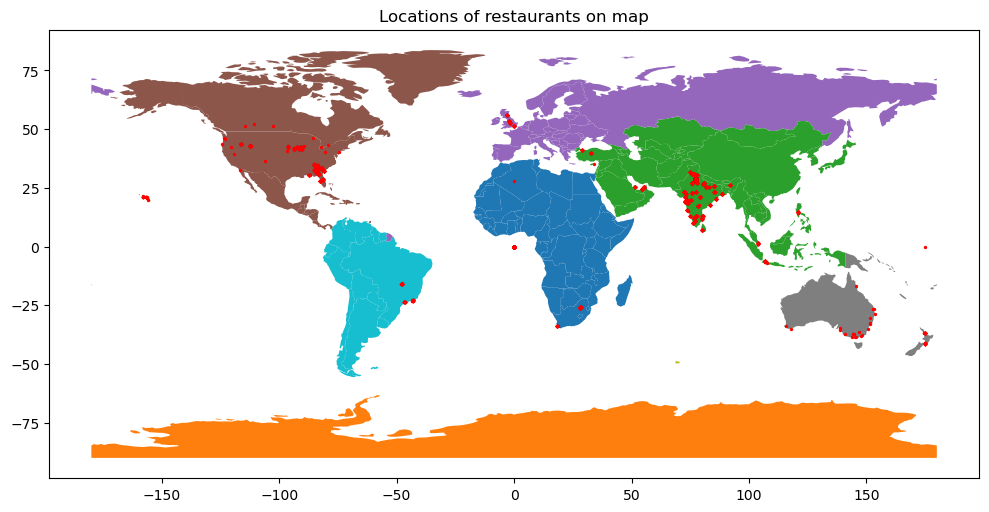

In [10]:
geometry = [Point(xy) for xy in zip(data["Longitude"], data["Latitude"])]
gdata = gpd.GeoDataFrame(data, geometry=geometry)
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
ax = world.plot('continent',figsize=(12, 6))
gdata.plot(ax=ax, marker=".", color="red", markersize=8)
plt.title("Locations of restaurants on map")
plt.show()

### Clusters of restaurants 

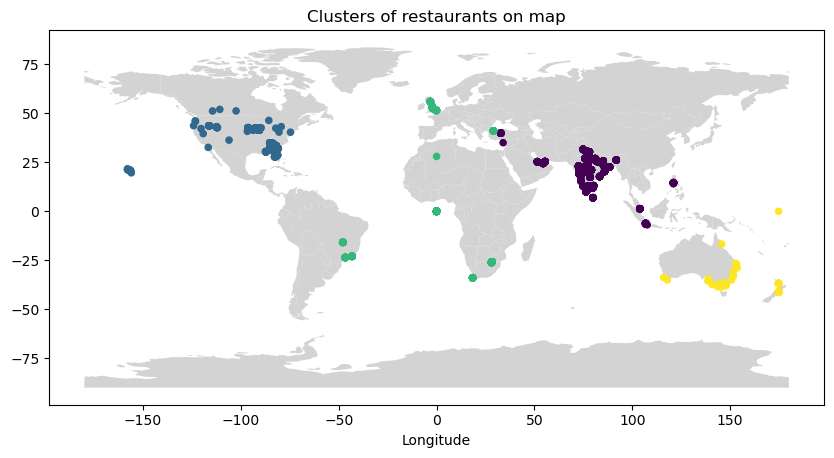

In [18]:
from sklearn.cluster import KMeans
fig,ax = plt.subplots(figsize = (10,6))
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world.plot(ax = ax,color="lightgray")

map_data = data[['Longitude','Latitude']]
kmean = KMeans(n_clusters = 4,init = 'k-means++',n_init = 'auto')
kmean.fit(map_data)
map_data['Labels'] = kmean.labels_
ax.scatter(map_data['Longitude'],map_data['Latitude'],c = map_data['Labels'],s = 20)
plt.title("Clusters of restaurants on map")
plt.xlabel('Longitude')
plt.show()


## Task 4: Restaurant Chains

### Restaurant chains

In [12]:
restaurant_counts = data['Restaurant Name'].value_counts()
restaurant_chains = restaurant_counts[restaurant_counts > 1]
print('Restaurant Chains')
restaurant_chains

Restaurant Chains


Restaurant Name
Cafe Coffee Day                   83
Domino's Pizza                    79
Subway                            63
Green Chick Chop                  51
McDonald's                        48
                                  ..
Zaika Kathi Rolls                  2
The Night Owl                      2
The Cheesecake Factory             2
New Kadimi                         2
Ceviche Tapas Bar & Restaurant     2
Name: count, Length: 734, dtype: int64

### Ratings of different restaurant chains

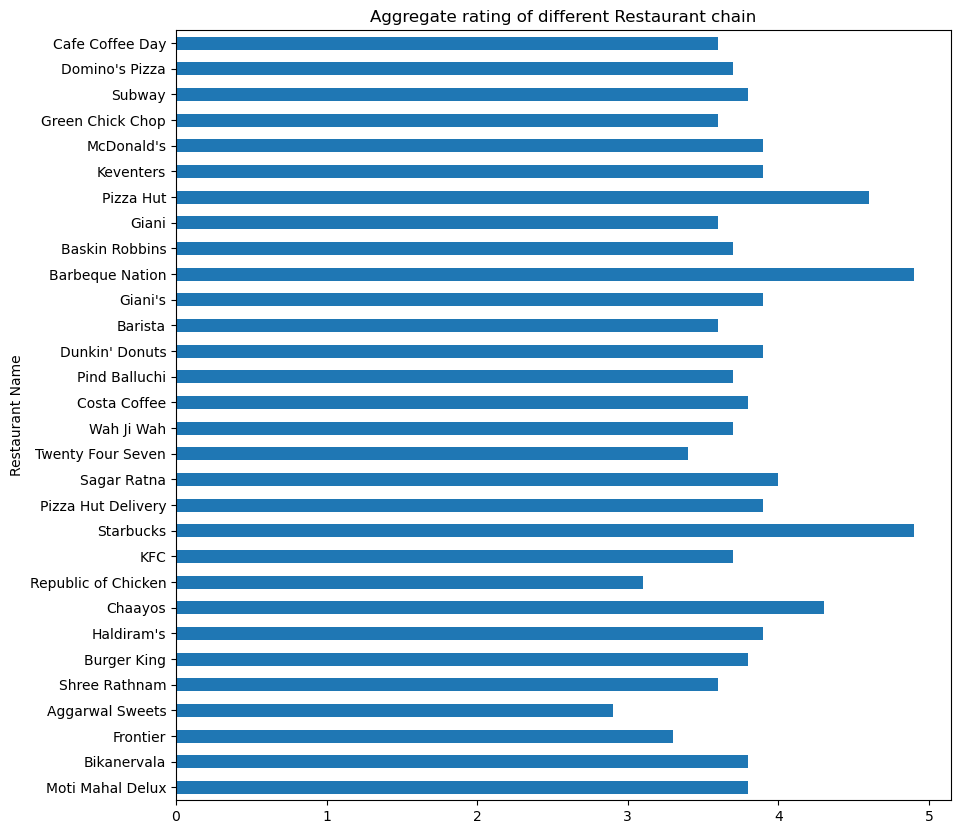

In [13]:
chain_data = data[data['Restaurant Name'].isin(restaurant_chains.index)]
agg_rating = chain_data.groupby('Restaurant Name')['Aggregate rating'].max()
agg_rating = agg_rating[restaurant_counts.index[:30]]

plt.figure(figsize = (10,10))
agg_rating.plot.barh()
plt.title('Aggregate rating of different Restaurant chain')
plt.gca().invert_yaxis()
plt.show()

### Popularity of different restaurant chains

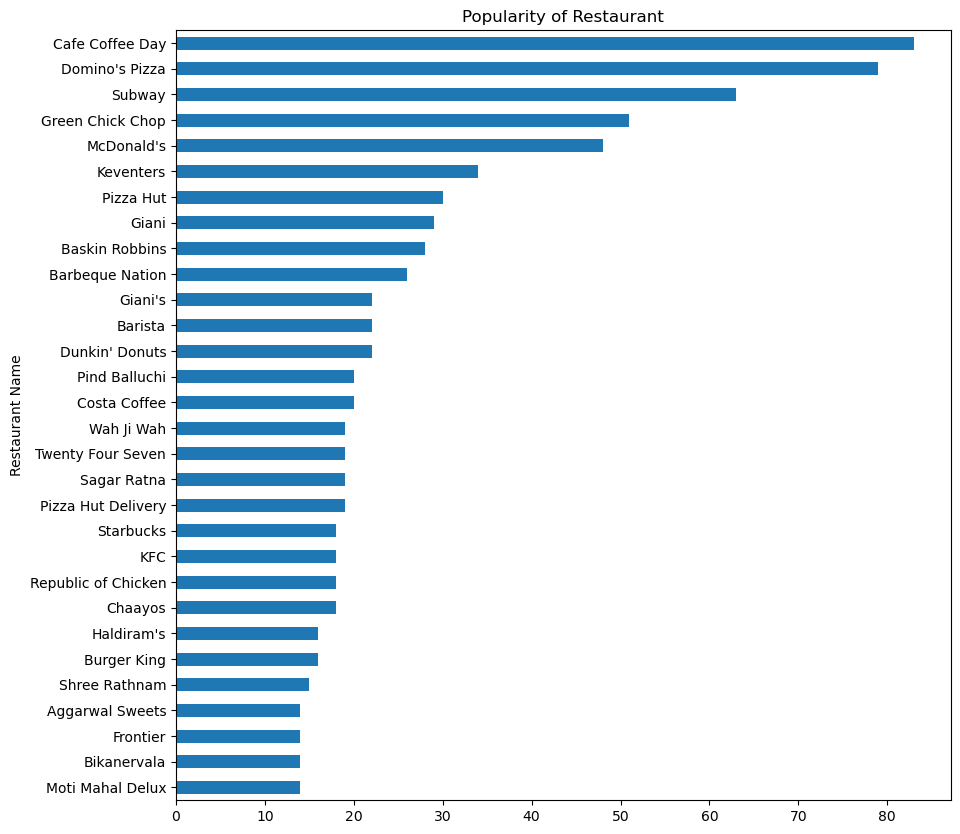

In [14]:
restaurant_counts = data['Restaurant Name'].value_counts()
plt.figure(figsize = (10,10))
plt.title('Popularity of Restaurant')
restaurant_counts[:30].plot.barh()
plt.gca().invert_yaxis() 
plt.show()